<a href="https://colab.research.google.com/github/gabrielnichio/multiclass-prediction/blob/main/collage_dropout_predictions_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer

In [53]:
data = pd.read_csv("/content/dados_estudantes.csv")
data.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

# Transforming the data

In [55]:
x = data.drop(columns='Target')
y = data['Target']

In [56]:
column_names = x.columns

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Target')

one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary', sparse_output=False),
    categorical_cols
),
  remainder='passthrough',
  sparse_threshold=0
)

x = one_hot.fit_transform(x)

In [57]:
enc = LabelEncoder().fit(y)
y = enc.transform(y)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, random_state=0)

# Training the algorithm

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
model = RandomForestClassifier(random_state=0, max_depth=10)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

In [62]:
print(f"Training accuracy: {model.score(x_train, y_train)}")
print(f"Validation accuracy: {model.score(x_val, y_val)}")

Training accuracy: 0.8964539007092198
Validation accuracy: 0.7670212765957447


# Confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

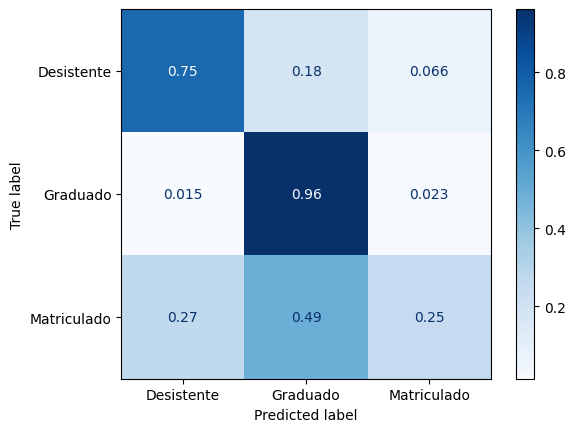

In [75]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues', display_labels=['Desistente', 'Graduado', 'Matriculado']);

# Classification report

In [77]:
from sklearn.metrics import classification_report

In [81]:
report = classification_report(y_val, y_pred, target_names = ['Desistente', 'Graduado', 'Matriculado'])
print(report)

              precision    recall  f1-score   support

  Desistente       0.81      0.75      0.78       302
    Graduado       0.77      0.96      0.85       469
 Matriculado       0.58      0.25      0.35       169

    accuracy                           0.77       940
   macro avg       0.72      0.66      0.66       940
weighted avg       0.75      0.77      0.74       940

